In [1]:
import os
import requests
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from bs4 import BeautifulSoup

In [22]:
! pip install seaborn

# Data exploration
## exploration of [UvA Alma Beelbank](https://uba.uva.nl/en/support/open-data/data-sets-and-publication-channels/data-sets-and-publication-channels.html#Archeological-objects)
details: 35564 records, 14 columns

In [2]:
alma_beeldbank = pd.read_xml('../data/CUE/uva_alma_beeldbank_dc_new.xml')
alma_beeldbank

,schemaLocation,title,description,publisher,contributor,date,type,identifier,language,relation,subject,coverage,format,source
0,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Architecture, peinture et sculpture de la mais...",Beschrijving gedrukte uitgave,A Amsterdam chez Gerard Valk,"Quellinus, Artus (Artus), beeldhouwer, 1609-16...",1719,None,https://hdl.handle.net/11245/3.3680,fre,"Architecture, peinture et sculpture de la mais...",None,None,None,None
1,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Max Havelaar, of de Koffij-veilingen der neder...",Beschrijving gedrukte uitgave,Brussel,"Lennep, J. van (Jacob), 1802-1868, publisher (...",1859,None,https://hdl.handle.net/11245/3.3641,dut,"Max Havelaar, of de Koffij-veilingen der neder...",None,None,None,None
2,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Rayz Beschraybung 1719-1724,Beschrijving gedrukte uitgave,Amsterdam,Zevi Hirsh ben Abraham transcriber,1752,None,https://hdl.handle.net/11245/3.3708,yid,Rayz Beschraybung 1719-1724,None,None,None,None
3,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Meleket ha-diqduq,Beschrijving gedrukte uitgave,Amsterdam,"ʾAbohav, Yiẕḥaq, 1605-1693 author (NL-LeOCL)...",1631,None,https://hdl.handle.net/11245/3.3709,heb,Meleket ha-diqduq,None,None,None,None
4,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Neederlandsche historien,Beschrijving gedrukte uitgave,Amsterdam Muiden,"Hooft, P.C. (Pieter Corneliszoon), 1581-1647 a...",1628,None,https://pid.uba.uva.nl/ark:/88238/b19900378229...,dut,Nederlandsche historien sedert de overdraght d...,Tachtigjarige oorlog,Nederland.http://data.bibliotheken.nl/id/thes/...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35559,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Lipsius, Justus, 1547-1606 schilderij: portret",Beschrijving gedrukte uitgave,None,None,1743,None,https://hdl.handle.net/11245/3.94,xxx,"Lipsius, Justus, 1547-1606",None,None,geschilderd,None
35560,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Alexander VII, Paus, regerend 1655-1667 schild...",Beschrijving gedrukte uitgave,None,None,1743,None,https://hdl.handle.net/11245/3.2533,xxx,"Alexander VII, Paus, regerend 1655-1667",None,None,geschilderd,None
35561,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Commelin, J. (Johannes) (1629-1692) schilderij...",Beschrijving gedrukte uitgave,None,None,1889,None,https://hdl.handle.net/11245/3.708,xxx,"Commelin, J. (Johannes) (1629-1692)",None,None,geschilderd,None
35562,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Walraven, D.A. (Didericus Adrianus) (1732-1804...",Beschrijving gedrukte uitgave,None,None,1770,None,https://hdl.handle.net/11245/3.2525,xxx,"Walraven, D.A. (Didericus Adrianus) (1732-1804)",None,None,geschilderd,None


In [4]:
# print dataset rule
alma_beeldbank.iloc[0]

schemaLocation    http://www.openarchives.org/OAI/2.0/oai_dc/ ht...
title             Architecture, peinture et sculpture de la mais...
description                           Beschrijving gedrukte uitgave
publisher                              A Amsterdam chez Gerard Valk
contributor       Quellinus, Artus (Artus), beeldhouwer, 1609-16...
date                                                           1719
type                                                           None
identifier                      https://hdl.handle.net/11245/3.3680
language                                                        fre
relation          Architecture, peinture et sculpture de la mais...
subject                                                        None
coverage                                                       None
format                                                         None
source                                                         None
Name: 0, dtype: object

In [5]:
# identifiers
alma_beeldbank['identifier'].iloc[0]

'https://hdl.handle.net/11245/3.3680'

In [6]:
# process for latex code
alma_beeldbank.iloc[0].to_markdown()

"|                | 0                                                                                                                                                                       |\n|:---------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------|\n| schemaLocation | http://www.openarchives.org/OAI/2.0/oai_dc/ http://www.openarchives.org/OAI/2.0/oai_dc.xsd                                                                              |\n| title          | Architecture, peinture et sculpture de la maison de ville d'Amsterdam, représentée en 109 figures en taille-douce                                                       |\n| description    | Beschrijving gedrukte uitgave                                                                                                                                           |\n| publisher      | A Amsterdam chez Gerard Valk  

In [11]:
# produce description of dataset
alma_beeldbank.describe()

,schemaLocation,title,description,publisher,contributor,date,type,identifier,language,relation,subject,coverage,format,source
count,35564,35564,35512,29517,28220,35093,897,35564,35564,35496,10883,2050,5390,1
unique,1,29216,16,5941,8817,899,3,35554,55,29299,2832,630,245,1
top,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,lamp aardewerk: lamp,Beschrijving gedrukte uitgave,Jerusalem,Pekidim & Amarkalim (Amsterdam) rcp,1889,http://vocab.getty.edu/aat/300028094,http://hdl.handle.net/11245/test.3.41731,dut,lamp,Boekenveilingen,Nederland.http://data.bibliotheken.nl/id/thes/...,vorm,de Nieuwe Bijdragen voor het Onderwijs en de O...
freq,35564,256,31678,5890,10044,1548,655,8,13451,264,3264,236,932,1


### Dataset info. 

In [8]:
alma_beeldbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   schemaLocation  35564 non-null  object
 1   title           35564 non-null  object
 2   description     35512 non-null  object
 3   publisher       29517 non-null  object
 4   contributor     28220 non-null  object
 5   date            35093 non-null  object
 6   type            897 non-null    object
 7   identifier      35564 non-null  object
 8   language        35564 non-null  object
 9   relation        35496 non-null  object
 10  subject         10883 non-null  object
 11  coverage        2050 non-null   object
 12  format          5390 non-null   object
 13  source          1 non-null      object
dtypes: object(14)
memory usage: 3.8+ MB


### dataset per subject

In [10]:
alma_beeldbank[alma_beeldbank['subject'].notnull()]

,schemaLocation,title,description,publisher,contributor,date,type,identifier,language,relation,subject,coverage,format,source
4,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Neederlandsche historien,Beschrijving gedrukte uitgave,Amsterdam Muiden,"Hooft, P.C. (Pieter Corneliszoon), 1581-1647 a...",1628,None,https://pid.uba.uva.nl/ark:/88238/b19900378229...,dut,Nederlandsche historien sedert de overdraght d...,Tachtigjarige oorlog,Nederland.http://data.bibliotheken.nl/id/thes/...,None,None
58,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Sisouan : hamagrouthiun Hajkakan Kilikioj eu L...,Beschrijving gedrukte uitgave,Venetik S. Ghazar,"Ališan, Ġevond, 1820-1901. (NL-LeOCL)0703445...",1885,None,https://hdl.handle.net/11245/3.3642,arm,Sisouan :,Armeniërs,Cilicië.http://data.bibliotheken.nl/id/thes/p0...,None,None
64,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Les délices du Watergraefs- ou Diemer-meer, pr...",Beschrijving gedrukte uitgave,Amsteldam By Andries en Hendrik de Leth kunsth...,"Broue͏̈rius van Nidek, Matthaeus, 1677-1743. (...",1725,None,https://hdl.handle.net/11245/3.3657,fre,"Het verheerlykt Watergraefs- of Diemer-meer, b...",Wegen,Watergraafsmeer.http://data.bibliotheken.nl/id...,None,None
69,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Historische beschryvinghe van Amsterdam,Beschrijving gedrukte uitgave,t'Amsterdam by Jacob van Meurs boekverkooper e...,"Dapper, O. (Olfert), 1636-1689. (NL-LeOCL)0699...",1663,None,https://hdl.handle.net/11245/3.3646,dut,Historische beschryving der stadt Amsterdam:,"Willem II, prins van Oranje, 1626-1650.",Amsterdam (stad).http://data.bibliotheken.nl/i...,None,None
73,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Catalogus van de boekwerken behoorende tot de ...,Beschrijving gedrukte uitgave,[S.l.],Nederlandsch Onderwĳzers-Genootschap,1871,None,https://hdl.handle.net/11245/3.3603,dut,Catalogus van de boekwerken behoorende tot de ...,370,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34703,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Naaukeurige versameling der gedenk-waardigste ...,Beschrijving gedrukte uitgave,Te Leyden by Pieter vander Aa boekverkoper,"Almagro, Diego de, 1475-1538. (NL-LeOCL)074503...",1707,None,https://hdl.handle.net/11245/3.3721,spa,Naaukeurige versameling der gedenk-waardigste ...,"Almagro, Diego de, 1475-1538.",Peru.http://data.bibliotheken.nl/id/thes/p0786...,None,None
34704,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Naaukeurige versameling der gedenk-waardigste ...,Beschrijving gedrukte uitgave,Te Leyden by Pieter vander Aa boekverkooper,"Ayllon, Lucas Vasquez de, 1520 fl. (NL-LeOCL)1...",1707,None,https://hdl.handle.net/11245/3.3718,spa,Naaukeurige versameling der gedenk-waardigste ...,"Ayllon, Lucas Vasquez de, 1520 fl.",Midden-Amerika.http://data.bibliotheken.nl/id/...,None,None
34705,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Naaukeurige versameling der gedenk-waardigste ...,Beschrijving gedrukte uitgave,Te Leyden by Pieter van der Aa boekverkoper,"Mascarenhas, Pero (NL-LeOCL)144244322 https://...",1707,None,https://hdl.handle.net/11245/3.3717,por,Naaukeurige versameling der gedenk-waardigste ...,"Mascarenhas, Pero",Azië.http://data.bibliotheken.nl/id/thes/p0784...,None,None
34706,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Naaukeurige versameling der gedenk-waardigste ...,Beschrijving gedrukte uitgave,Te Leyden by Pieter van der Aa boekverkoper,"Sampayo, Lopo Vaz de, 1526 fl. (NL-LeOCL)14424...",1707,None,https://hdl.handle.net/11245/3.3722,por,Naaukeurige versameling der gedenk-waardigste ...,Ontdekkingsreizen,Indonesië.http://data.bibliotheken.nl/id/thes/...,None,None


In [14]:
# top 10 counts per subject
alma_beeldbank[alma_beeldbank['subject'].notnull()]['subject'].value_counts()[:10]

Boekenveilingen                          3264
Lezen                                     308
Rekenen                                   201
Nederlands                                193
18.11 Dutch literature.                   172
Prenten                                   165
Dutch literature                          158
Geografie                                 152
Frans                                     144
Simons, Menno, anabaptist, 1496-1561.      80
Name: subject, dtype: int64

In [92]:
subjects[subjects['subject'] == 'Prenten']

,schemaLocation,title,description,publisher,contributor,date,type,identifier,language,relation,subject,coverage,format,source
234,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Catalogus der tot de bibliotheek der Remonstra...,Beschrijving gedrukte uitgave,Amsterdam,None,1930,None,https://hdl.handle.net/11245/3.3434,und,Catalogus der tot de bibliotheek der Remonstra...,Prenten,None,None,None
13407,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van José de la Rica y...",Beschrijving gedrukte uitgave,Den Haag Van Stockum's Antiquariaat,Van Stockum's Antiquariaat Den Haag,1913,None,https://hdl.handle.net/11245/3.24863,xxx,"Veilingcatalogus, boeken van José de la Rica y...",Prenten,None,None,None
13429,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van J. P. de K... ......",Beschrijving gedrukte uitgave,Den Haag Van Stockum's Antiquariaat,Van Stockum's Antiquariaat Den Haag,1915,None,https://hdl.handle.net/11245/3.24945,xxx,"Veilingcatalogus, boeken van J. P. de K... ......",Prenten,None,None,None
13449,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van W. N. Claassen .....",Beschrijving gedrukte uitgave,Amsterdam H. G. Bom,H. G. Bom Amsterdam,1916,None,https://hdl.handle.net/11245/3.25000,xxx,"Veilingcatalogus, boeken van W. N. Claassen .....",Prenten,None,None,None
13454,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van J. J. van Geuns ....",Beschrijving gedrukte uitgave,Den Haag Van Stockum's Antiquariaat,Van Stockum's Antiquariaat Den Haag,1917,None,https://hdl.handle.net/11245/3.25014,xxx,"Veilingcatalogus, boeken van J. J. van Geuns ....",Prenten,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van Isaac Cordes Jzn ...",Beschrijving gedrukte uitgave,Amsterdam J. Radink,Frederik Muller Amsterdam,1843,None,https://hdl.handle.net/11245/3.21537,xxx,"Veilingcatalogus, boeken van Isaac Cordes Jzn ...",Prenten,None,None,None
18084,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van E. J. de Court va...",Beschrijving gedrukte uitgave,Dordrecht van Geluk & Mak van Waay,van Geluk & Mak van Waay Dordrecht,1847,None,https://hdl.handle.net/11245/3.21650,xxx,"Veilingcatalogus, boeken van E. J. de Court va...",Prenten,None,None,None
18106,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van A. Lipkens ... [e...",Beschrijving gedrukte uitgave,Den Haag W. P. van Stockum,W. P. van Stockum Den Haag,1849,None,https://hdl.handle.net/11245/3.21720,xxx,"Veilingcatalogus, boeken van A. Lipkens ... [e...",Prenten,None,None,None
18128,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,"Veilingcatalogus, boeken van W. van Dam van Br...",Beschrijving gedrukte uitgave,Den Haag W. P. van Stockum,W. P. van Stockum Den Haag,1859,None,https://hdl.handle.net/11245/3.21769,xxx,"Veilingcatalogus, boeken van W. van Dam van Br...",Prenten,None,None,None


<AxesSubplot:xlabel='type', ylabel='count'>

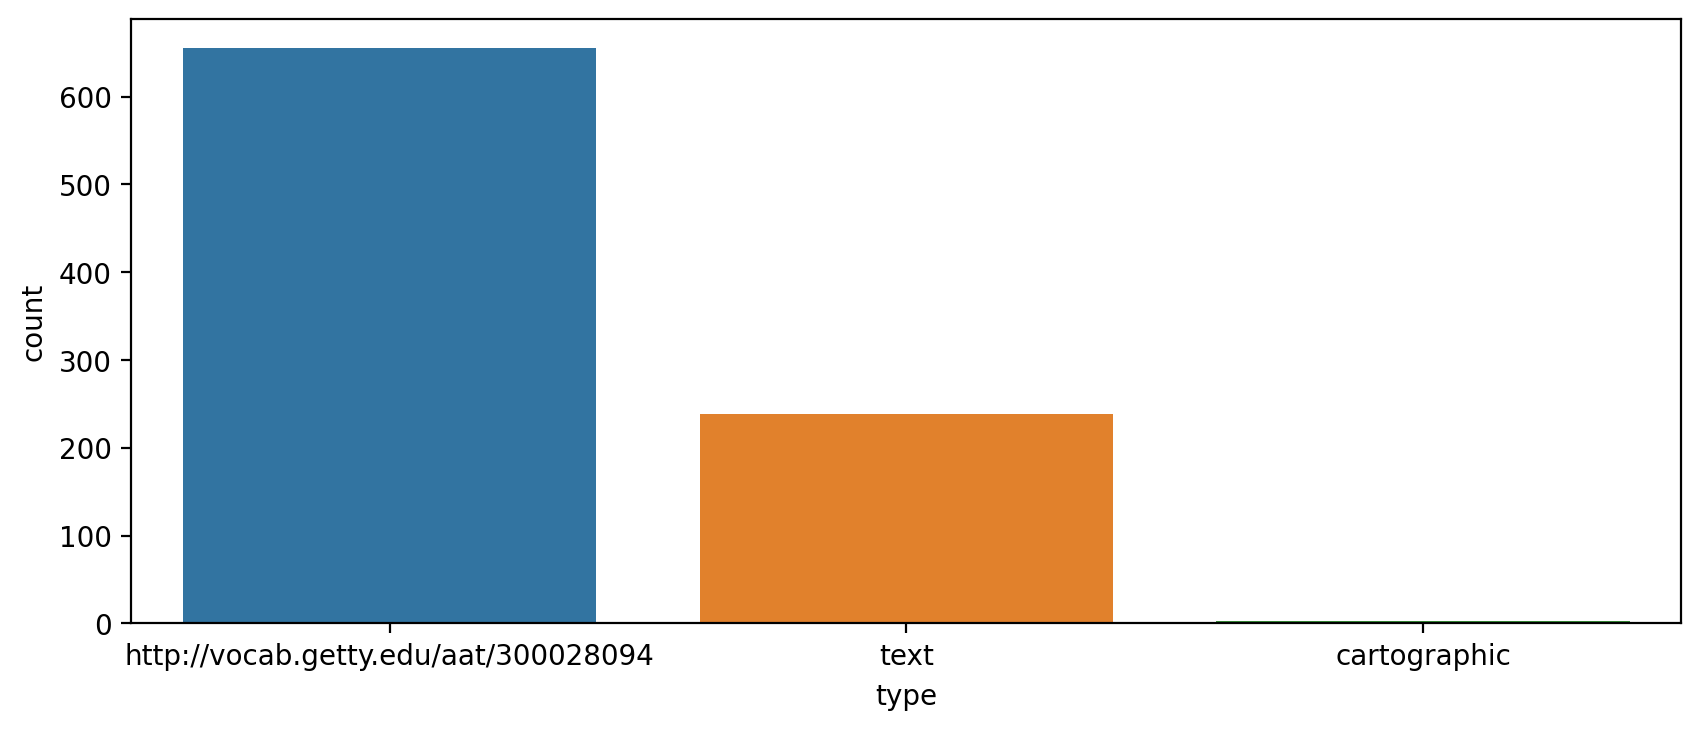

In [3]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='type',data=alma_beeldbank)

In [23]:
alma_beeldbank['format'].value_counts().iloc[:10]

vorm                            932
handgemaakt: aquarel            838
op de schijf gedraaid           399
aardewerkmateriaal              300
sculptuur, afgietsel in gips    241
offset                          209
geschilderd                     205
gedrukt: lithografie            167
vlakdruk                        141
sculptuur                       135
Name: format, dtype: int64

In [26]:
list(alma_beeldbank['language'].unique())

['fre',
 'dut',
 'yid',
 'heb',
 'lat',
 'arm',
 'arc',
 'spa',
 'ita',
 'ger',
 'por',
 'eng',
 'goh',
 'nds',
 'und',
 'grc',
 'mul',
 'ara',
 'fry',
 'mis',
 'swe',
 'afr',
 'may',
 'san',
 'chi',
 'nor',
 'rus',
 'dan',
 'map',
 'jav',
 'sun',
 'dum',
 'epo',
 'gre',
 'ben',
 'hun',
 'paa',
 'fin',
 'pol',
 'ban',
 'per',
 'Nederlands [TA].',
 'hin',
 'ind',
 'egy',
 'xxx',
 'Text in Latin and Dutch.',
 'Hebreeuws in Latijns schrift.',
 'Duits met Hebreeuwse letters.',
 'In het Duits met Hebreeuwse letters.',
 'Duits met Hebreeuwse.',
 'Tekst in het Duits met Hebreeuwse letters.',
 'Taal onduidelijk, vermoedelijk Duits.',
 'Taal: misschien Hebreeuws in transcriptie.',
 'Taal onduidelijk, vermoedelijk Hebreeuws in transcriptie.']

In [27]:
alma_beeldbank['language'].value_counts().iloc[:10]

dut    13451
heb     9764
xxx     8702
ger      992
fre      664
lat      634
eng      576
und      183
yid      151
spa       70
Name: language, dtype: int64

In [32]:
alma_beeldbank['contributor'].value_counts()[:10]

Pekidim & Amarkalim (Amsterdam) rcp                                                                                                                      10044
H. G. Bom Amsterdam                                                                                                                                        270
G. Th. Bom & Zn Amsterdam                                                                                                                                  156
J. L. Beijers Utrecht                                                                                                                                      156
R. W. P. de Vries Amsterdam                                                                                                                                126
P. Beijer Groningen                                                                                                                                        113
Van Stockum's Antiquariaat Den Haag           

In [34]:
unique_dates = alma_beeldbank['date'].unique()

In [4]:
alma_beeldbank['date'].value_counts()[:20]

1889    1548
1887    1518
1888    1282
1918    1066
1917    1052
1916    1050
1915    1049
1919    1032
1910     916
1914     885
1883     860
1899     830
1900     769
1913     754
1891     708
1901     683
1912     677
1911     666
1884     619
1903     549
Name: date, dtype: int64

In [5]:
alma_beeldbank = alma_beeldbank.dropna(subset=['date'])

In [6]:
alma_beeldbank = alma_beeldbank[alma_beeldbank['date'].str.isnumeric()]

In [7]:
alma_beeldbank['date'] = alma_beeldbank['date'].astype(int)

In [8]:
alma_beeldbank = alma_beeldbank[alma_beeldbank['date'] <= 2022]

In [9]:
alma_beeldbank = alma_beeldbank.sort_values('date')

In [10]:
alma_beeldbank['date'].value_counts(sort=False)

1       16
20       5
30       2
34       1
41       1
        ..
2002     1
2004     3
2005     5
2006     2
2007    13
Name: date, Length: 498, dtype: int64

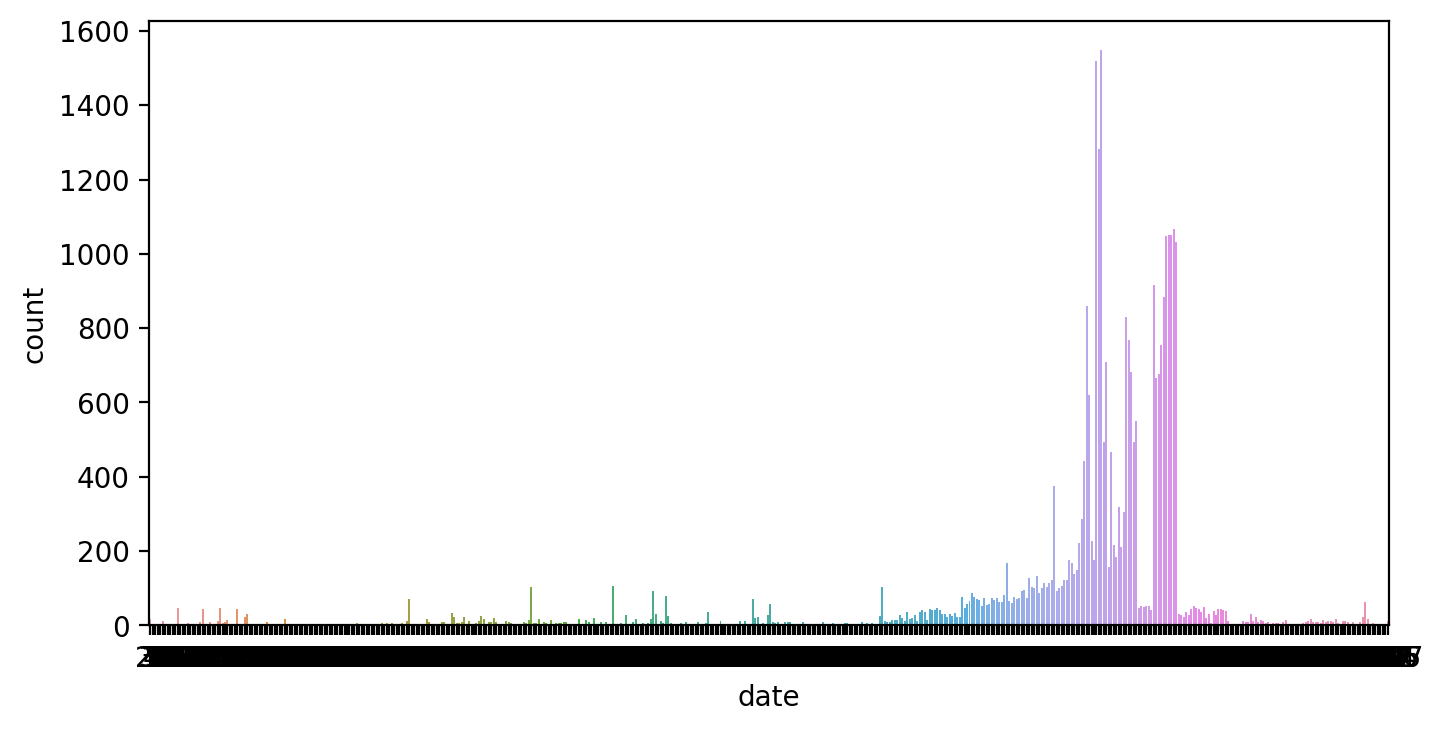

In [13]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(x='date', data=alma_beeldbank)
plt.xticks(size=10)
plt.show()


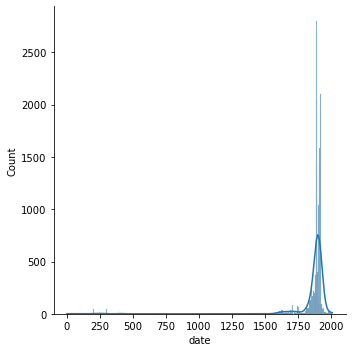

In [16]:
sns.displot(data=alma_beeldbank, x='date', kde=True)
plt.show()

In [19]:
joined = " ".join(alma_beeldbank['title'].dropna().unique())

In [20]:
import wordcloud

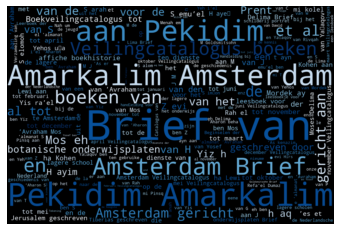

In [21]:
# code copied from: https://jingwen-z.github.io/data-viz-with-matplotlib-series9-word-cloud/
wordcloud = wordcloud.WordCloud(width=1280, height=853, margin=0,
                      colormap='Blues').generate(joined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.savefig('descriptions_wordcloud.png')
plt.show()

In [26]:
# check for apm references
alma_beeldbank['title'].str.contains('APM').any()

False

## Beeldbank marc

In [29]:
alma_beeldbank_marc = pd.read_xml('../data/CUE/uva_alma_beeldbank_marc_new.xml')

In [30]:
titles = [record.title() for record in alma_beeldbank_marc]

In [37]:
alma_beeldbank_marc['leader'].iloc[3]

'01381npmaa2200349M  4500'

In [46]:
from pymarc import MARCReader

with open('data/uva_alma_archobjects_marc_new.mrc', 'rb') as fh:
    reader = MARCReader(fh)
    for record in reader:
        print(record)

ModuleNotFoundError: No module named 'pymarc'

In [47]:
from pymarc import parse_xml_to_array

records = parse_xml_to_array('data/uva_alma_archobjects_marc_new.xml')
records

ModuleNotFoundError: No module named 'pymarc'

## Data exploration of [archaeological objects](https://uba.uva.nl/en/support/open-data/data-sets-and-publication-channels/data-sets-and-publication-channels.html#Archeological-objects)
dublin core, [download](https://diensten.uba.uva.nl/open_data/downloads/uva_alma_archobjects_dc_new.tar.gz)

In [41]:
# dc export
uva_alma_archobjects = pd.read_xml('../data/CUE/uva_alma_archobjects_dc_new.xml')
uva_alma_archobjects

,schemaLocation,title,description,publisher,date,type,format,identifier,language,relation,subject,contributor
0,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,Amfoor aardewerk; vaatwerk,None,None,900-600 voor Christus IJzertijd II,NaN,op wiel gedraaid,https://pid.uba.uva.nl/ark:/88238/b19900378131...,xxx,None,None,None
1,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,vrouwenkop gips; menselijke figuur,None,None,1860,NaN,gegoten,https://pid.uba.uva.nl/ark:/88238/b19900377732...,xxx,None,None,None
2,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,vrouwenkop gips; menselijke figuur,None,None,1860,NaN,gegoten,https://pid.uba.uva.nl/ark:/88238/b19900377732...,xxx,None,None,None
3,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,hangertje glas: sieraad,None,None,200 n. Chr.,NaN,gegoten,https://pid.uba.uva.nl/ark:/88238/b19900377732...,xxx,None,None,None
4,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,hangertje glas: sieraad,None,None,200 n. Chr.,NaN,gegoten,https://pid.uba.uva.nl/ark:/88238/b19900377732...,xxx,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
18268,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,fragmenten kom vaas tegel aardewerk: architect...,Architectural Terracottas in the Allard Pierso...,None,keizertijd,NaN,aardewerkmateriaal,https://pid.uba.uva.nl/ark:/88238/b19900325330...,xxx,None,None,None
18269,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,baksteen aardewerk: architecturaal,Architectural Terracottas in the Allard Pierso...,None,keizertijd,NaN,vorm incisie,https://pid.uba.uva.nl/ark:/88238/b19900325330...,xxx,None,None,None
18270,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,legioenbaksteen aardewerk: architecturaal,Architectural Terracottas in the Allard Pierso...,None,keizertijd,NaN,vorm,https://pid.uba.uva.nl/ark:/88238/b19900325329...,xxx,None,None,None
18271,http://www.openarchives.org/OAI/2.0/oai_dc/ ht...,lansmodel organisch: wapen,None,None,1800,NaN,houtmateriaal,https://pid.uba.uva.nl/ark:/88238/b19900325329...,xxx,None,None,None


In [49]:
# check for apm references
uva_alma_archobjects[uva_alma_archobjects['title'].str.contains('APM')]['title'].iloc[0]

'APM16615: eros organisch: mensfiguur, meubel'

## theater dataset

In [ ]:
tin = pd.read_xml('data/wwwopac_TIN_limit100000.xml')
tin

In [5]:
tin_1 = pd.read_xml('data/theatercollecties_test1.xml')
tin_1

,creator,creator.role,New_collect_field,performance.production_code,performance.title,performance.title.lref,production.date,reproduction.identifier_URL,reproduction.reference,institution.name,object_category,object_name,object_number,priref,production.date.start,title
0,"Roelofs, Charles",None,None,NaN,None,NaN,None,None,None,None,None,None,None,NaN,NaN,None
1,"Moritz, Ernst",None,None,NaN,None,NaN,None,None,None,None,None,None,None,NaN,NaN,None
2,None,ontwerp,None,NaN,None,NaN,None,None,None,None,None,None,None,NaN,NaN,None
3,None,fotografie,None,NaN,None,NaN,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,Gelegenheidscombinaties,1.238905e+08,Aias,21012.0,1939-05-23,None,None,None,None,None,None,NaN,NaN,None
5,None,None,None,NaN,None,NaN,None,qm00217.000.jpg,qm00217.000,None,None,None,None,NaN,NaN,None
6,None,None,None,NaN,None,NaN,None,None,None,Theater Instituut Nederland,None,None,None,NaN,NaN,None
7,None,None,None,NaN,None,NaN,None,None,None,None,maquette,None,None,NaN,NaN,None
8,None,None,None,NaN,None,NaN,None,None,None,None,None,maquette,None,NaN,NaN,None
9,None,None,None,NaN,None,NaN,None,None,None,None,None,None,qm00217.000,NaN,NaN,None


In [48]:
tin_1 = pd.read_xml('data/theatercollecties_test1.xml')

values = [tin_1[c].iloc[tin_1[c].first_valid_index()] for c in tin_1.columns]

# expects list of tuples: [('column name', 'column_value'), ..., ]
def to_lod(input_field):
    if input_field[0] == 'creator':
        return ('http://purl.org/dc/elements/1.1/creator', input_field[1])
    if input_field[0] == 'creator.role':
        return ('http://purl.org/dc/elements/1.1/creator', input_field[1])
    if input_field[0] == 'performance.title':
        return ('https://www.dublincore.org/specifications/dublin-core/dcmi-terms/elements11/title/', input_field[1])
    if input_field[0] == 'production.date':
        return ('http://purl.org/dc/elements/1.1/date', input_field[1])
    if input_field[0] == 'reproduction.reference':
        return ('http://purl.org/dc/elements/1.1/identifier', input_field[1])
    if input_field[0] == 'object_category':
        return ('https://www.dublincore.org/specifications/dublin-core/dcmi-terms/elements11/type/', input_field[1])
    else: 
        return input_field

result = map(to_lod, list(zip(tin_1.columns, values)))
lod_result = pd.DataFrame(result, columns= ['predicate', 'object'])
lod_result


XMLSyntaxError: Start tag expected, '<' not found, line 1, column 1 (<string>, line 1)

In [12]:
import requests

URL = "https://servicetin.adlibhosting.com/te4/wwwopac.ashx?command=search&database=collectTEphotos3&search=pointer%20353&output=xml&limit=10&startfrom=1&xmltype=grouped"

response = requests.get(URL)
with open('feed.xml', 'wb') as file:
    file.write(response.content)

In [15]:
tin_1 = pd.read_xml('feed.xml')
tin_1

,record,hits,xmltype,hits_on_display,search,first_item,forward,backward,limit,dbname,dsname,cgistring,link_resolve_time
0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,NaN,759.0,Grouped,10.0,pointer 353,1.0,0.0,0.0,10.0,collect,intern,NaN,93.7474


## export images from alma beeldbank

In [ ]:
import requests
from bs4 import BeautifulSoup

# Making a GET request
r = requests.get('https://www.theatercollectie.uva.nl/Details/collect/42164')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

In [ ]:
s = soup.find('div', class_='record')

labels = s.find('div', class_='label')
values = s.find('div', class_='value')
s

In [3]:
from PIL import Image
import requests
import bs4

In [43]:
alma_beeldbank['identifier']

# for handl in alma_beeldbank['identifier']:
#     print(handl)

# url = 'some.site.com'

# response = requests.get(url)

# soup = bs4.BeautifulSoup(response.text, 'html.parser')

# image = soup.find('img')
# image_url = image['src']


# img = Image.open(requests.get(image_url, stream = True).raw)

# img.save('image.jpg')

0                      https://hdl.handle.net/11245/3.3680
1                      https://hdl.handle.net/11245/3.3641
2                      https://hdl.handle.net/11245/3.3708
3                      https://hdl.handle.net/11245/3.3709
4        https://pid.uba.uva.nl/ark:/88238/b19900378229...
                               ...                        
35559                    https://hdl.handle.net/11245/3.94
35560                  https://hdl.handle.net/11245/3.2533
35561                   https://hdl.handle.net/11245/3.708
35562                  https://hdl.handle.net/11245/3.2525
35563                   https://hdl.handle.net/11245/3.205
Name: identifier, Length: 35564, dtype: object

# linking from online --> offline

In [6]:
literature = []

def literature(link):
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")

    lit = []

    litsec = soup.find_all(class_="row label-publications")

    for l in litsec:
        lit += [l.find_all(class_='object-detail-data')[0].text]
    return lit

l = alma_beeldbank['identifier'].iloc[:50].apply(literature)

In [7]:
alma_beeldbank['literature'] = l

In [10]:
alma_beeldbank['literature']
alma_beeldbank['literature'].iloc[8]

['Bibliotheca gastronomica 4112']

In [12]:
query = ['Bibliotheca']
df_x = alma_beeldbank.explode('literature')
df_x.set_index('literature').loc[query].reset_index(drop=True)

KeyError: "None of [Index(['Bibliotheca'], dtype='object', name='literature')] are in the [index]"

In [7]:
alma_beeldbank['literature'] = literature

0         []
1         []
2         []
3         []
4         []
        ... 
35559    NaN
35560    NaN
35561    NaN
35562    NaN
35563    NaN
Name: literature, Length: 35564, dtype: object

# ground truth APM labels

In [3]:
import math

In [4]:
df = pd.read_excel('../data/catalogs/Crossroads - spreadsheet.xlsx', header=9)

In [5]:
import re

def apm(descr):
    return re.findall('(?:APM)\s*\d+', descr)

df['APM'] = df['Image name'].dropna().apply(apm)

In [6]:
df['APM']

0             NaN
1             NaN
2              []
3              []
4              []
          ...    
249           NaN
250           NaN
251           NaN
252    [APM 7808]
253            []
Name: APM, Length: 254, dtype: object

In [7]:
references = df['APM'].values.tolist()

In [8]:
references = [r for r in references if r != [] and type(r) != float]

In [9]:
references
online_indices = [(0,0),(3,0),(5,0),(6,0),(9,1)]

In [10]:
references

[['APM16324'],
 ['APM7855'],
 ['APM9278'],
 ['APM16772'],
 ['APM7468'],
 ['APM 12995'],
 ['APM16323'],
 ['APM7798'],
 ['APM3830'],
 ['APM 14036'],
 ['APM 8471'],
 ['APM7071'],
 ['APM16369'],
 ['APM 7808']]

actually we have to cross reference this against the APM numbers in the pdf of the catalog

In [11]:
# from catalog

In [12]:
illustratieverantwoording = ' 10 above (APM16324),  \n1 3 (APM13822, APM9370),  \n29 above (APM7855),  5 1 (APM9276, APM9278, APM9280),  52 (APM16772),  \n66 (APM7468),  \n6 7 (APM12995),  \n69, 71 (APM7798),  \n72 (APM16388),  73 (APM3830),  \n7 4 (APM7798),  \n103 below (APM12974), \n1 46 (APM8471),  1 47 (APM8107),  \n1 6 2 (APM7071),  1 63 left (APM09163),  \n1 63 right (APM15589),  \n1 7 6 above (APM16369), 1 80 (APM3831, APM10998)'

In [13]:
references_book = apm(str(illustratieverantwoording))

In [14]:
def cross_reference(references, references_book):
    
    cr = []
    
    for r in references_book:
        if [r] in references:
            cr += [r]
    return cr

In [15]:
references, references_book

([['APM16324'],
  ['APM7855'],
  ['APM9278'],
  ['APM16772'],
  ['APM7468'],
  ['APM 12995'],
  ['APM16323'],
  ['APM7798'],
  ['APM3830'],
  ['APM 14036'],
  ['APM 8471'],
  ['APM7071'],
  ['APM16369'],
  ['APM 7808']],
 ['APM16324',
  'APM13822',
  'APM9370',
  'APM7855',
  'APM9276',
  'APM9278',
  'APM9280',
  'APM16772',
  'APM7468',
  'APM12995',
  'APM7798',
  'APM16388',
  'APM3830',
  'APM7798',
  'APM12974',
  'APM8471',
  'APM8107',
  'APM7071',
  'APM09163',
  'APM15589',
  'APM16369',
  'APM3831',
  'APM10998'])

In [16]:
# all of the 

In [17]:
cross_reference(references, references_book)

['APM16324',
 'APM7855',
 'APM9278',
 'APM16772',
 'APM7468',
 'APM7798',
 'APM3830',
 'APM7798',
 'APM7071',
 'APM16369']

In [18]:
"Inventory numbers Allard
Pierson Museum
Cover: 14232
p. 6: 16751
p. 28: 3493
p. 31: 3271
p. 33: 7802
p. 35: above 7164, below 7316
p. 37: 7971
p. 38: 9227
p. 40: 16883
p. 41: 16228
p. 43: 13055
p. 45: 1379
p. 48: 13937
p. 50: above 12378, below
10167
p. 52: 13825
p. 53: 1627
p. 55: 7347 and 7349
p. 56: 7286
p. 57: 7359 and 13963
p. 59: 7326
p. 61: 2907
p. 62: 1786 (photo Restauratieatelier
Restaura)
p. 64: above 3239 and 2845,
below 1785
p. 65: 788
p. 69: 1892
p. 72: 8343
p. 73: above 13946,
below 15758
p. 74: above 15369 and 15370
p. 75: 14005
p. 76: 6349
p. 77: 12428
p. 78: 7592
p. 80: 15396
p. 81: 8188
p. 82: 3242 and 3243
p. 84: above 9374, below 1774
p. 85: 8180
p. 86: 3269
p. 87: 3422
p. 92: 12
p. 93 above 1606
p. 95: 8552
p. 96: 35
p. 97: above 12417, below
12534
p. 100: above 7066, 8124, 8116,
below 8117, 7065, 8120
p. 101: 7974
p. 102: 7757
p. 103: 8133
p. 104: left 7288, 7290, 7874
and 8023, right 725
p. 105: 7768
p. 107: 8146.001-009
p. 108: 8169
p. 109: 16217
p. 110: 16166
p. 115: 9234
p. 118: 1674
p. 119: 15076
p. 122: 1402
p. 123: 8016
p. 124: 7799
p. 126: 8175
p. 128: 7946
p. 131: 11972
p. 132: 1765
p. 133: 15914
p. 137: 5205, 5208, 5216, 5220,
5222, 5230
p. 139: 15927
p. 140: 9894-9900, 10675
p. 141: 9350
p. 142: 8133
p. 143: 7022
p. 144: 6295, 6296, 7304,
7308, 14165
p. 145: 7001, 7003, 7004
p. 146: 724
p. 148: 1687
p. 151: above 15746, below
1722
p. 153: 8363, 319, 1681, 6319,
p. 156: 12.324
p. 157: left 16618, right 12481
p. 158: above 15689,
below 15999
p. 161: 451
p. 162: 3579
p. 163: 7163
p. 164: 7310
p. 165: 9224
p. 167: 7379
p. 174: 14.409
p. 176: 5180
p. 177: 16763
p. 178-179: 10854
p. 180: 10.854
p. 181: 9241
p. 182: 6287
p. 183: 16882
p. 185: 16604, 16607, 16612,
16614, 16616, 16610

SyntaxError: EOL while scanning string literal (1299147726.py, line 1)

In [19]:
Inventarisnummers
Allard Pierson Museum
omslag: 4076
blz. 17: boven 196-1/2; onder
4170-4173, 4222
blz. 18: 4206, 4143, 4145
blz. 21: 15290
blz. 22: boven 4162, 4218, 4164, 4219;
onder 3974/3863, 3972A
blz. 23: 12637
blz. 33: 12720, 15276, 3943
blz. 34: boven 3858; onder 12676,
12678
blz. 35: boven 4044; onder 15999,
16476
blz. 37: 15302, 15301
blz. 39: boven 7298; onder 4306
blz. 40: 3635, 12683
blz. 42: boven 8752/14021; onder
Schriftmuseum Dortmond
P. Amsterdam 22
blz. 43: 9274, 15592
blz. 46: 3933
blz. 47: 8850
blz. 48: 3400
blz. 49: 16000
blz. 51: 8539
blz. 53: 12698
blz. 54: 12647, 14238
blz. 63: 15350
blz. 64: 9237
blz. 65: 8789
blz. 69: 12978
blz. 73: APM 9115
blz. 75: 1387
blz. 76: boven 3408, 360, 3799;
onder 11960
blz. 77: 12718, 8537
blz. 78: 8851; Schriftmuseum
Dortmond, no. 115
blz. 79: boven 9114; onder 8875, 1676
blz. 86: 16500
blz. 87: boven 9223; onder 8811
blz. 88: 13283a-j, 8800
blz. 99: 391
blz. 100: boven 8065; onder 13292
blz. 102: 7774
blz. 103: 12760, 4307, 15326
blz. 104: 12977
blz. 105: 9475, 9492, 9502
blz. 106: 8562, 8563, 8417
blz. 107: 8831
blz. 108: 20
blz. 109: 8837
blz. 111: 13219
blz. 115: 8795/6
blz. 116: 7126
blz. 117: 7772
blz. 118: 6289
blz. 119: 7993
blz. 120: 8846
blz. 124: 7216, 7238, 7272
blz. 125: 13158
blz. 129: 7758
blz. 130: 7763
blz. 131: 9369
blz. 132: 8517
blz. 133: 7796
blz. 135: 14232
blz. 136: 7860, 7861
blz. 137: 9353
blz. 138: 7874, 9227
blz. 139: 7803
blz. 141: 7766
blz. 142: boven 7757; onder 7974
blz. 143: 7761
blz. 144: 8188
blz. 145: 6286
blz. 150: 12995, 14513
blz. 152: boven 16750; onder 14510
blz. 153: 8189
blz. 159: 16385

SyntaxError: invalid syntax (1808091653.py, line 2)